In [2]:
##########      train      ###########
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#tain data 전처리
data=pd.read_excel('C:/Users/user/Desktop/psl/fault_feature 1000 2L.xls')

X_tn=data.drop(['target','type','m'], axis=1)
y_tn=data.filter(['target'])
z_tn=data.filter(['type'])

X_ac_tn=X_tn.filter(['VA_am','VA_aph','IA_am','IA_aph','VB_am','VB_aph','IB_am','IB_aph','VA_cm','VA_cph','IA_cm','IA_cph','VB_cm','VB_cph','IB_cm','IB_cph'])

row_tn=y_tn.shape[0]
yy_tn=y_tn.to_numpy()
z_tn=z_tn.to_numpy()
    
for i in range(0,row_tn-1):
    if z_tn[i]==4:
        yy_tn[i]=0
    elif z_tn[i]==5:
        yy_tn[i]=0
    elif z_tn[i]==6:
        yy_tn[i]=yy_tn[i]
    else:
        yy_tn[i]=0
        
yy_tn=pd.DataFrame(yy_tn)
print(yy_tn.shape)

(1000, 1)


In [4]:
#train data lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components = 3)
lda6 = lda.fit(X_ac_tn,yy_tn)

Xac_lda_tn=lda6.transform(X_ac_tn)

print(Xac_lda_tn.shape)

print(lda.explained_variance_ratio_)

(1000, 3)
[0.59306221 0.38590874 0.01944858]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


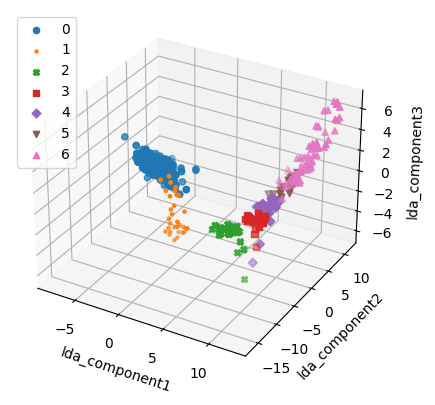

In [5]:
#lda train plot
lda_columns = ['lda_comp1', 'lda_comp2','lda_comp3']
Xac_lda_df = pd.DataFrame(Xac_lda_tn, columns=lda_columns)
Xac_lda_df['target'] = yy_tn

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df = Xac_lda_df
markers = ['o','.','X','s','D','v','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    type_i = i
    X1 = df_i['lda_comp1']
    X2 = df_i['lda_comp2']
    X3 = df_i['lda_comp3']
    ax.scatter(X1, X2, X3,
                marker=mark,
                label=type_i)

ax.set_xlabel('lda_component1')
ax.set_ylabel('lda_component2')
ax.set_zlabel('lda_component3')
ax.legend(loc='best')
plt.savefig('test.png')
plt.show()

In [6]:
##########      SVM train      ###########
from sklearn import svm 
svm_ac = svm.SVC(kernel='rbf', gamma=1)
svm_ac.fit(Xac_lda_tn, yy_tn)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=1)

In [7]:
##########      test      ###########
#test data 전처리
data_te=pd.read_excel('C:/Users/user/Desktop/psl/fault_feature_100 2L.xls')
X=data_te.drop(['target','type','m'],axis=1)
y=data_te.filter(['target'])
z=data_te.filter(['type'])

X_ac=X.filter(['VA_am','VA_aph','IA_am','IA_aph','VB_am','VB_aph','IB_am','IB_aph','VA_cm','VA_cph','IA_cm','IA_cph','VB_cm','VB_cph','IB_cm','IB_cph'])

row=y.shape[0]
yy=y.to_numpy()
z=z.to_numpy()

yy_ac=np.zeros((row,1))
    
for i in range(0,row-1):
    if z[i]==4:
        yy_ac[i]=0
    elif z[i]==5:
        yy_ac[i]=0
    elif z[i]==6:
        yy_ac[i]=yy[i]
    else:
        yy_ac[i]=0
        
yy_ac=pd.DataFrame(yy_ac)

In [11]:
#test data lda
Xac_lda=lda6.transform(X_ac)
Xac_lda_df = pd.DataFrame(Xac_lda)

In [12]:
#model test
pred_svm = svm_ac.predict(Xac_lda)
print(pred_svm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yy_ac, pred_svm)
print(accuracy)


from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy_ac, pred_svm)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(yy_ac, pred_svm)
print(class_report)

[0 0 0 0 4 0 0 0 0 1 5 0 0 0 3 0 0 0 6 0 0 3 5 1 4 2 0 0 0 1 0 4 0 1 2 3 0
 4 0 0 2 0 0 0 0 0 4 2 0 0 0 0 2 0 3 3 6 0 0 0 0 0 0 3 6 0 0 5 0 0 0 1 5 0
 6 0 2 1 0 0 0 0 1 0 0 4 0 2 0 0 0 1 0 0 0 6 0 0 1 0]
0.99
[[63  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  1  5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         7
         3.0       1.00      1.00      1.00         6
         4.0       1.00      1.00      1.00         6
         5.0       0.75      1.00      0.86         3
         6.0       1.00      0.83      0.91         6

    accuracy                           0.99       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.99      0.99      0.99       100

